# **Classification of areas prone to forest fires**


   *Aimi Okabayashi, Thomas Boyer, David Dahan Monsonego, Pierre-Aurélien Stahl, Pierre Personnat, Martial Gil


This challenge was done as a project for the Master 2 Data Science (2022/2023), DATACAMP course:
<br><br>


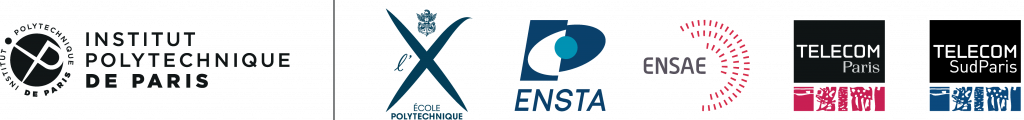

## **Introduction**

According to a Météo France study, risk of forest fire should be increasing in the years to come due to increased dryness. 



<img src="img\sizeofwildfires-large.png" >

                                            Nombre de feux de forêt aux Etats-Unis


This project aims at constructing a machine learning model capable at classifying point of areas prone to forest fires.



## **Description of the data**

Faire une description 

## **Requirements for running the notebook**

To properly run the notebook, the following Python modules must be imported :

In [1]:
%pip install ramp-workflow

Note: you may need to restart the kernel to use updated packages.


In [140]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from problem import get_train_data, get_test_data, _get_data

In [76]:
!python3 download_data.py

/Users/davedahan/Desktop/3A ENSTA/Data Camp/M2DS_DataCamp_Challenge/data directory is not empty. Please empty it or select another destination for LOCAL_DATA if you wish to proceed


## Reading data 

In [116]:
X = _get_data("./")

In [117]:
X.head()

Date  mean_temp  urban  max_v_wind  water  forest_cover   pop_dens  \
0  2015-03-16   6.754768    0.0    2.205310    0.0      0.000000   4.033057   
1  2009-12-09   6.821233    0.0    6.430786    0.0      0.583333  18.135365   
2  2019-09-18  13.656255    0.0    6.825171    0.0      1.000000  22.281998   
3  2003-11-17   8.737279    0.0    9.491487    1.0      0.000000   0.000000   
4  2013-07-07  11.469363    0.0    8.228761    1.0      0.000000   0.281414   

    max_temp  sum_prec  mean_soil       vegetation_class  mean_rel_hum  \
0  14.472850  0.134782   0.316853  herbaceous_vegetation     79.347466   
1  15.657491  2.295774   0.285537                 forest     71.278786   
2  20.192055  0.000000   0.249150                 forest     77.566093   
3  14.000954  0.000000   0.255162                  water     75.327393   
4  19.220186  0.000000   0.108047                  water     71.936470   

   wetland  mean_wind_angle  fire  
0      0.0       131.806229     0  
1      0.0       123.350800     0  
2      0.0       164.623947     0  
3      0.0       288.652771     0  
4      0.0       157.468475     1

## Description of the data

### Description of the DataFrame

In each row of the data, there is a label "fire" that show is there was a fire or not. Each row is susiptable to have a fire 0 or 1.

 The features are : 
    
- "Date" : Date of the events     

- "mean_temp" : Mean Temperature of the day (in °C)

- "urban" : ratio of urbanisation of the area (between 0 and 1)

- "max_v_wind" : maximimum of wind velocity (in m/s)

- "water" : ratio of water in the area (between 0 and 1)

- "forest_cover" : ratio of forest in the area (between 0 and 1)

- "pop_dens" : density of population in the area (between 0 and 1)

- "max_temp" : Maximum Temperature of the day (in °C)

- "sum_prec" : precipitation of the day in the area (in mm)

- "mean_soil" : Mean soil moisture of the day (m^3/m^3)

- "vegeation" : type of vegetation (list of names)

- "mean_rel_humidity" : mean relative humidity (in %)

- "wetland" : ratio of wetland in the area (between 0 and 1) 

- "mean_wind_angle" : average angle of wind during the event (in °)





### Description of the data

In [118]:
data=X.copy()

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16088 entries, 0 to 16087
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              16088 non-null  object 
 1   mean_temp         16088 non-null  float64
 2   urban             16084 non-null  float64
 3   max_v_wind        16088 non-null  float64
 4   water             16084 non-null  float64
 5   forest_cover      16088 non-null  float64
 6   pop_dens          16088 non-null  float64
 7   max_temp          16088 non-null  float64
 8   sum_prec          16088 non-null  float64
 9   mean_soil         16088 non-null  float64
 10  vegetation_class  16066 non-null  object 
 11  mean_rel_hum      16088 non-null  float64
 12  wetland           16084 non-null  float64
 13  mean_wind_angle   16088 non-null  float64
 14  fire              16088 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 1.8+ MB


In [120]:
description=data.describe()
description

mean_temp         urban    max_v_wind         water  forest_cover  \
count  16088.000000  16084.000000  16088.000000  16084.000000  16088.000000   
mean       7.341704      0.005145      5.702554      0.356224      0.435609   
std        3.292291      0.054010      2.479129      0.471296      0.456107   
min       -4.109107      0.000000      0.978202      0.000000      0.000000   
25%        5.045434      0.000000      3.834832      0.000000      0.000000   
50%        7.181344      0.000000      5.228662      0.000000      0.250000   
75%        9.484971      0.000000      7.156111      1.000000      1.000000   
max       18.774755      1.000000     17.892080      1.000000      1.000000   

           pop_dens      max_temp      sum_prec     mean_soil  mean_rel_hum  \
count  16088.000000  16088.000000  16088.000000  16088.000000  16088.000000   
mean      14.832645     15.256328      1.610403      0.284432     75.903259   
std      117.260923      4.471258      3.161810      0.078591      8.105770   
min        0.000000      1.171763     -0.000007      0.051477     40.705662   
25%        0.000000     12.000636      0.000000      0.231190     70.407461   
50%        0.020987     14.950378      0.155632      0.287328     75.780781   
75%        0.716459     18.387455      1.751230      0.344941     81.468296   
max     2219.102051     32.431244     35.396515      0.501387     98.558968   

            wetland  mean_wind_angle          fire  
count  16084.000000     16088.000000  16088.000000  
mean       0.014108       197.778334      0.185728  
std        0.085711        83.412931      0.388899  
min        0.000000         0.792745      0.000000  
25%        0.000000       133.823299      0.000000  
50%        0.000000       202.841095      0.000000  
75%        0.000000       257.814651      0.000000  
max        1.000000       358.530182      1.000000

## **Exploratory Data Analysis**

### Correlation

Plot of the correlations of the most correlated variables :

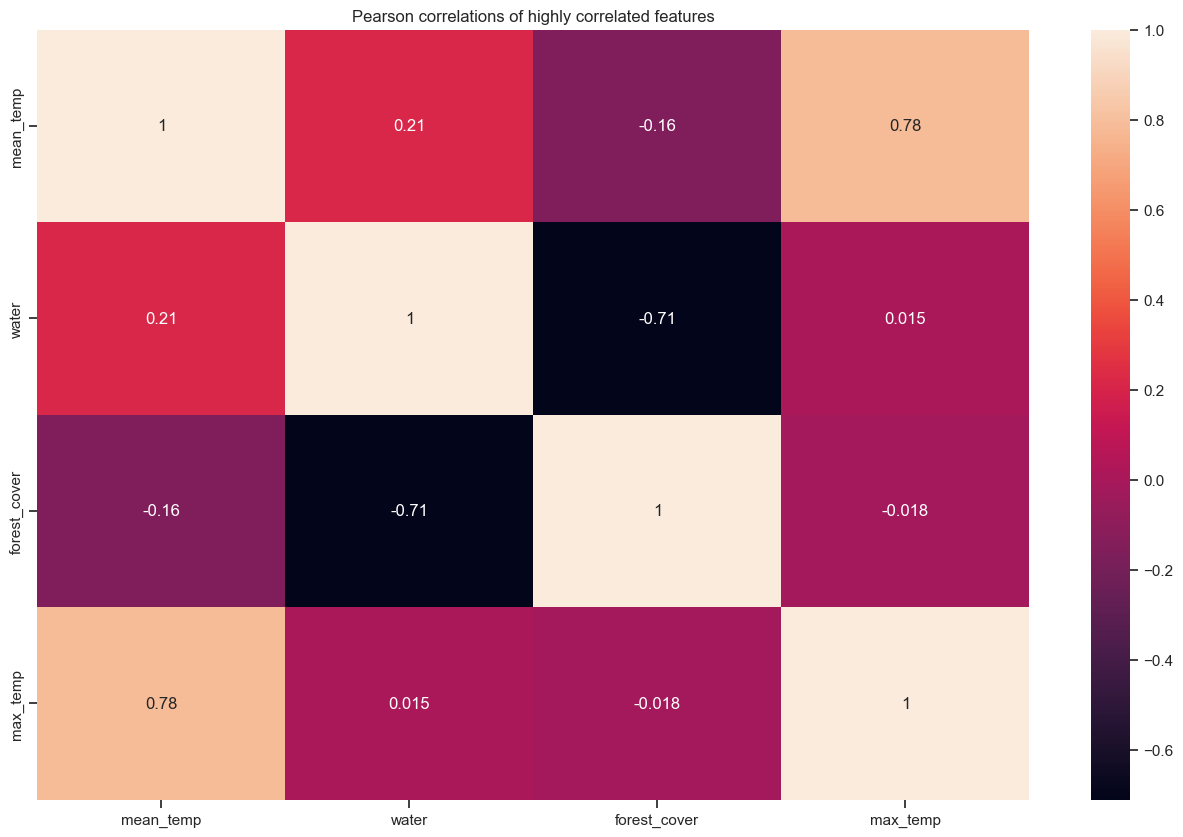

In [129]:
thresh = 0.7
cor = data.corr(numeric_only = True)

temp = cor.abs().unstack().sort_values(ascending=False)
most_cor_var = temp.loc[temp>thresh].reset_index().drop_duplicates(subset=[0])
most_cor_var_names = pd.unique(most_cor_var["level_0"].tolist()+most_cor_var["level_1"].tolist()).tolist()

top_cor = cor.loc[(cor.index.isin(most_cor_var_names)), (cor.columns.isin(most_cor_var_names))]

plt.figure(figsize=(16,10))
sns.heatmap(top_cor, annot=True)
plt.title("Pearson correlations of highly correlated features")
plt.show()

### Imbalenced Dataset

The dataset is imbalanced : 


<Axes: xlabel='fire', ylabel='count'>

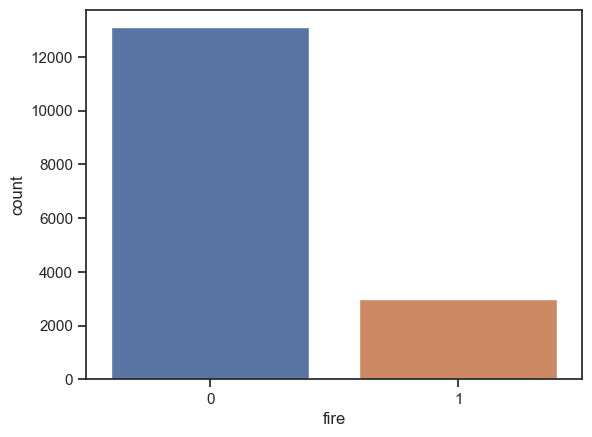

In [126]:
sns.countplot(data = data, x = "fire")

In [127]:
data["fire"].value_counts()

0    13100
1     2988
Name: fire, dtype: int64

In [128]:
ratio=data["fire"].value_counts()[1]/data["fire"].size
ratio

0.18572849328692193

### Others plots

Analysis of categorical feature : vegetation_class

[]

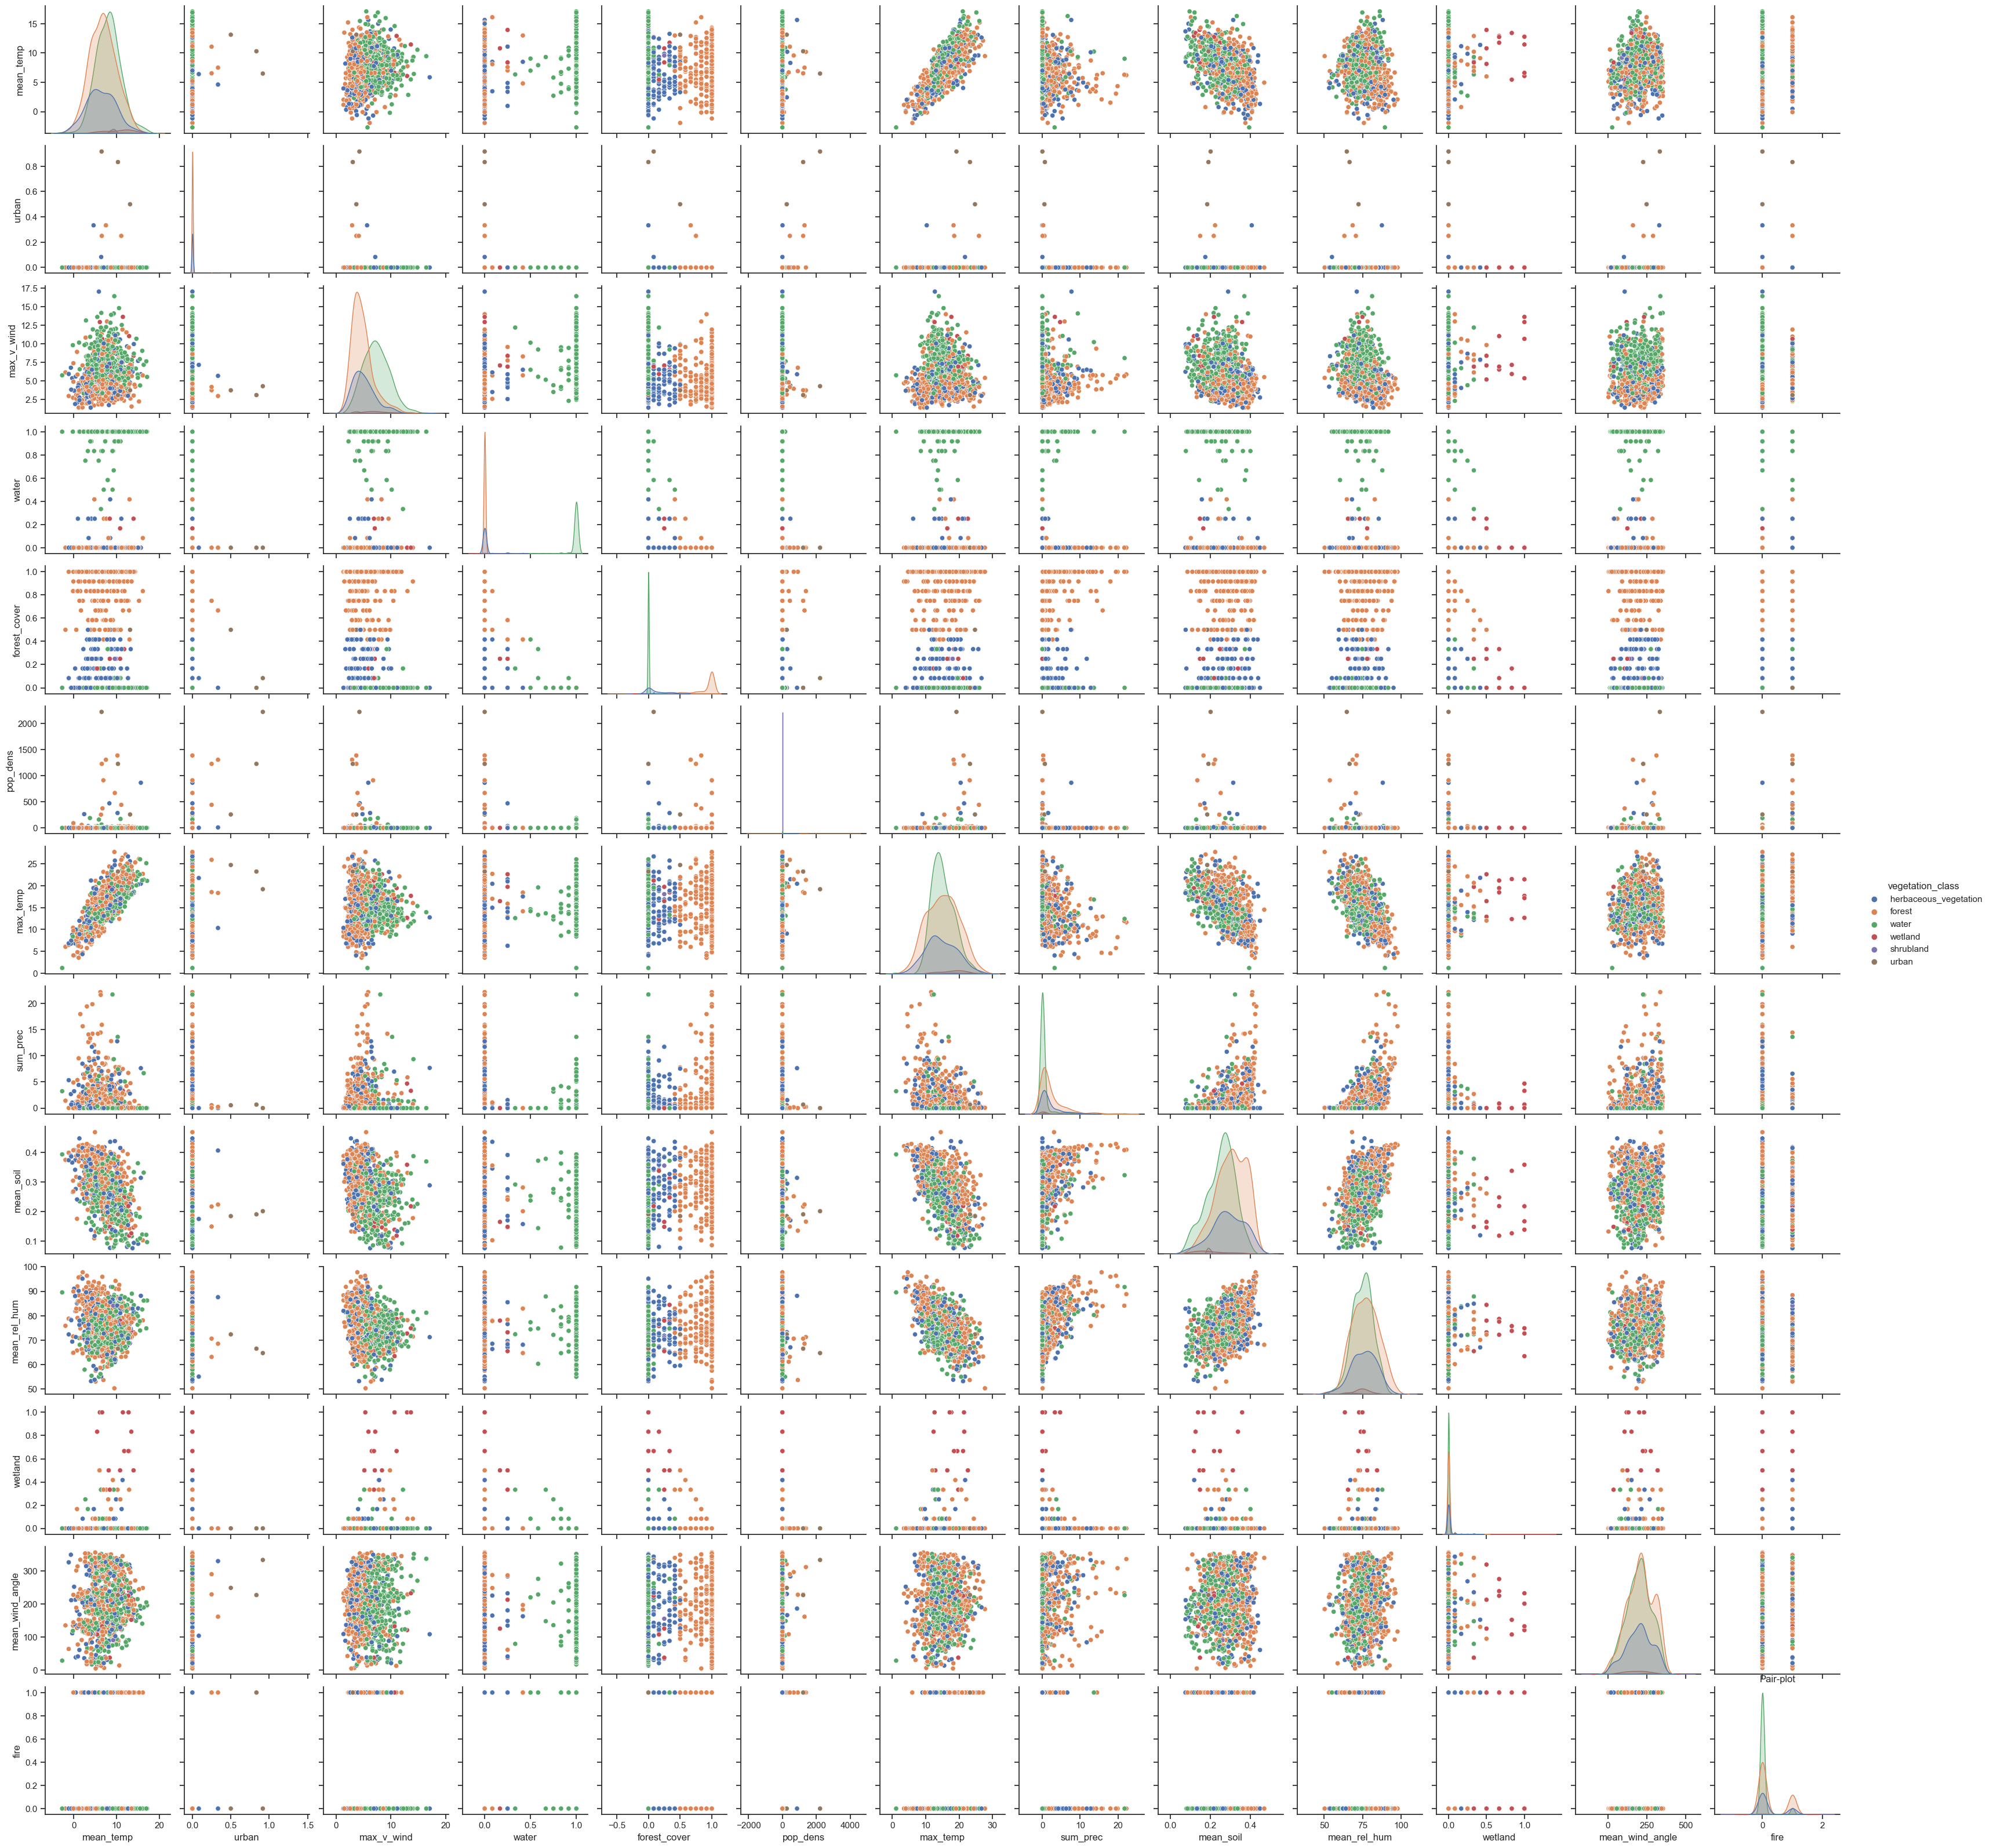

In [17]:
# plotting pair plots
sns.set_theme(style='ticks')
sns.pairplot(data[:1000], hue='vegetation_class')
plt.title('Pair-plot')
plt.plot()

Analyse of repartition for fire

[]

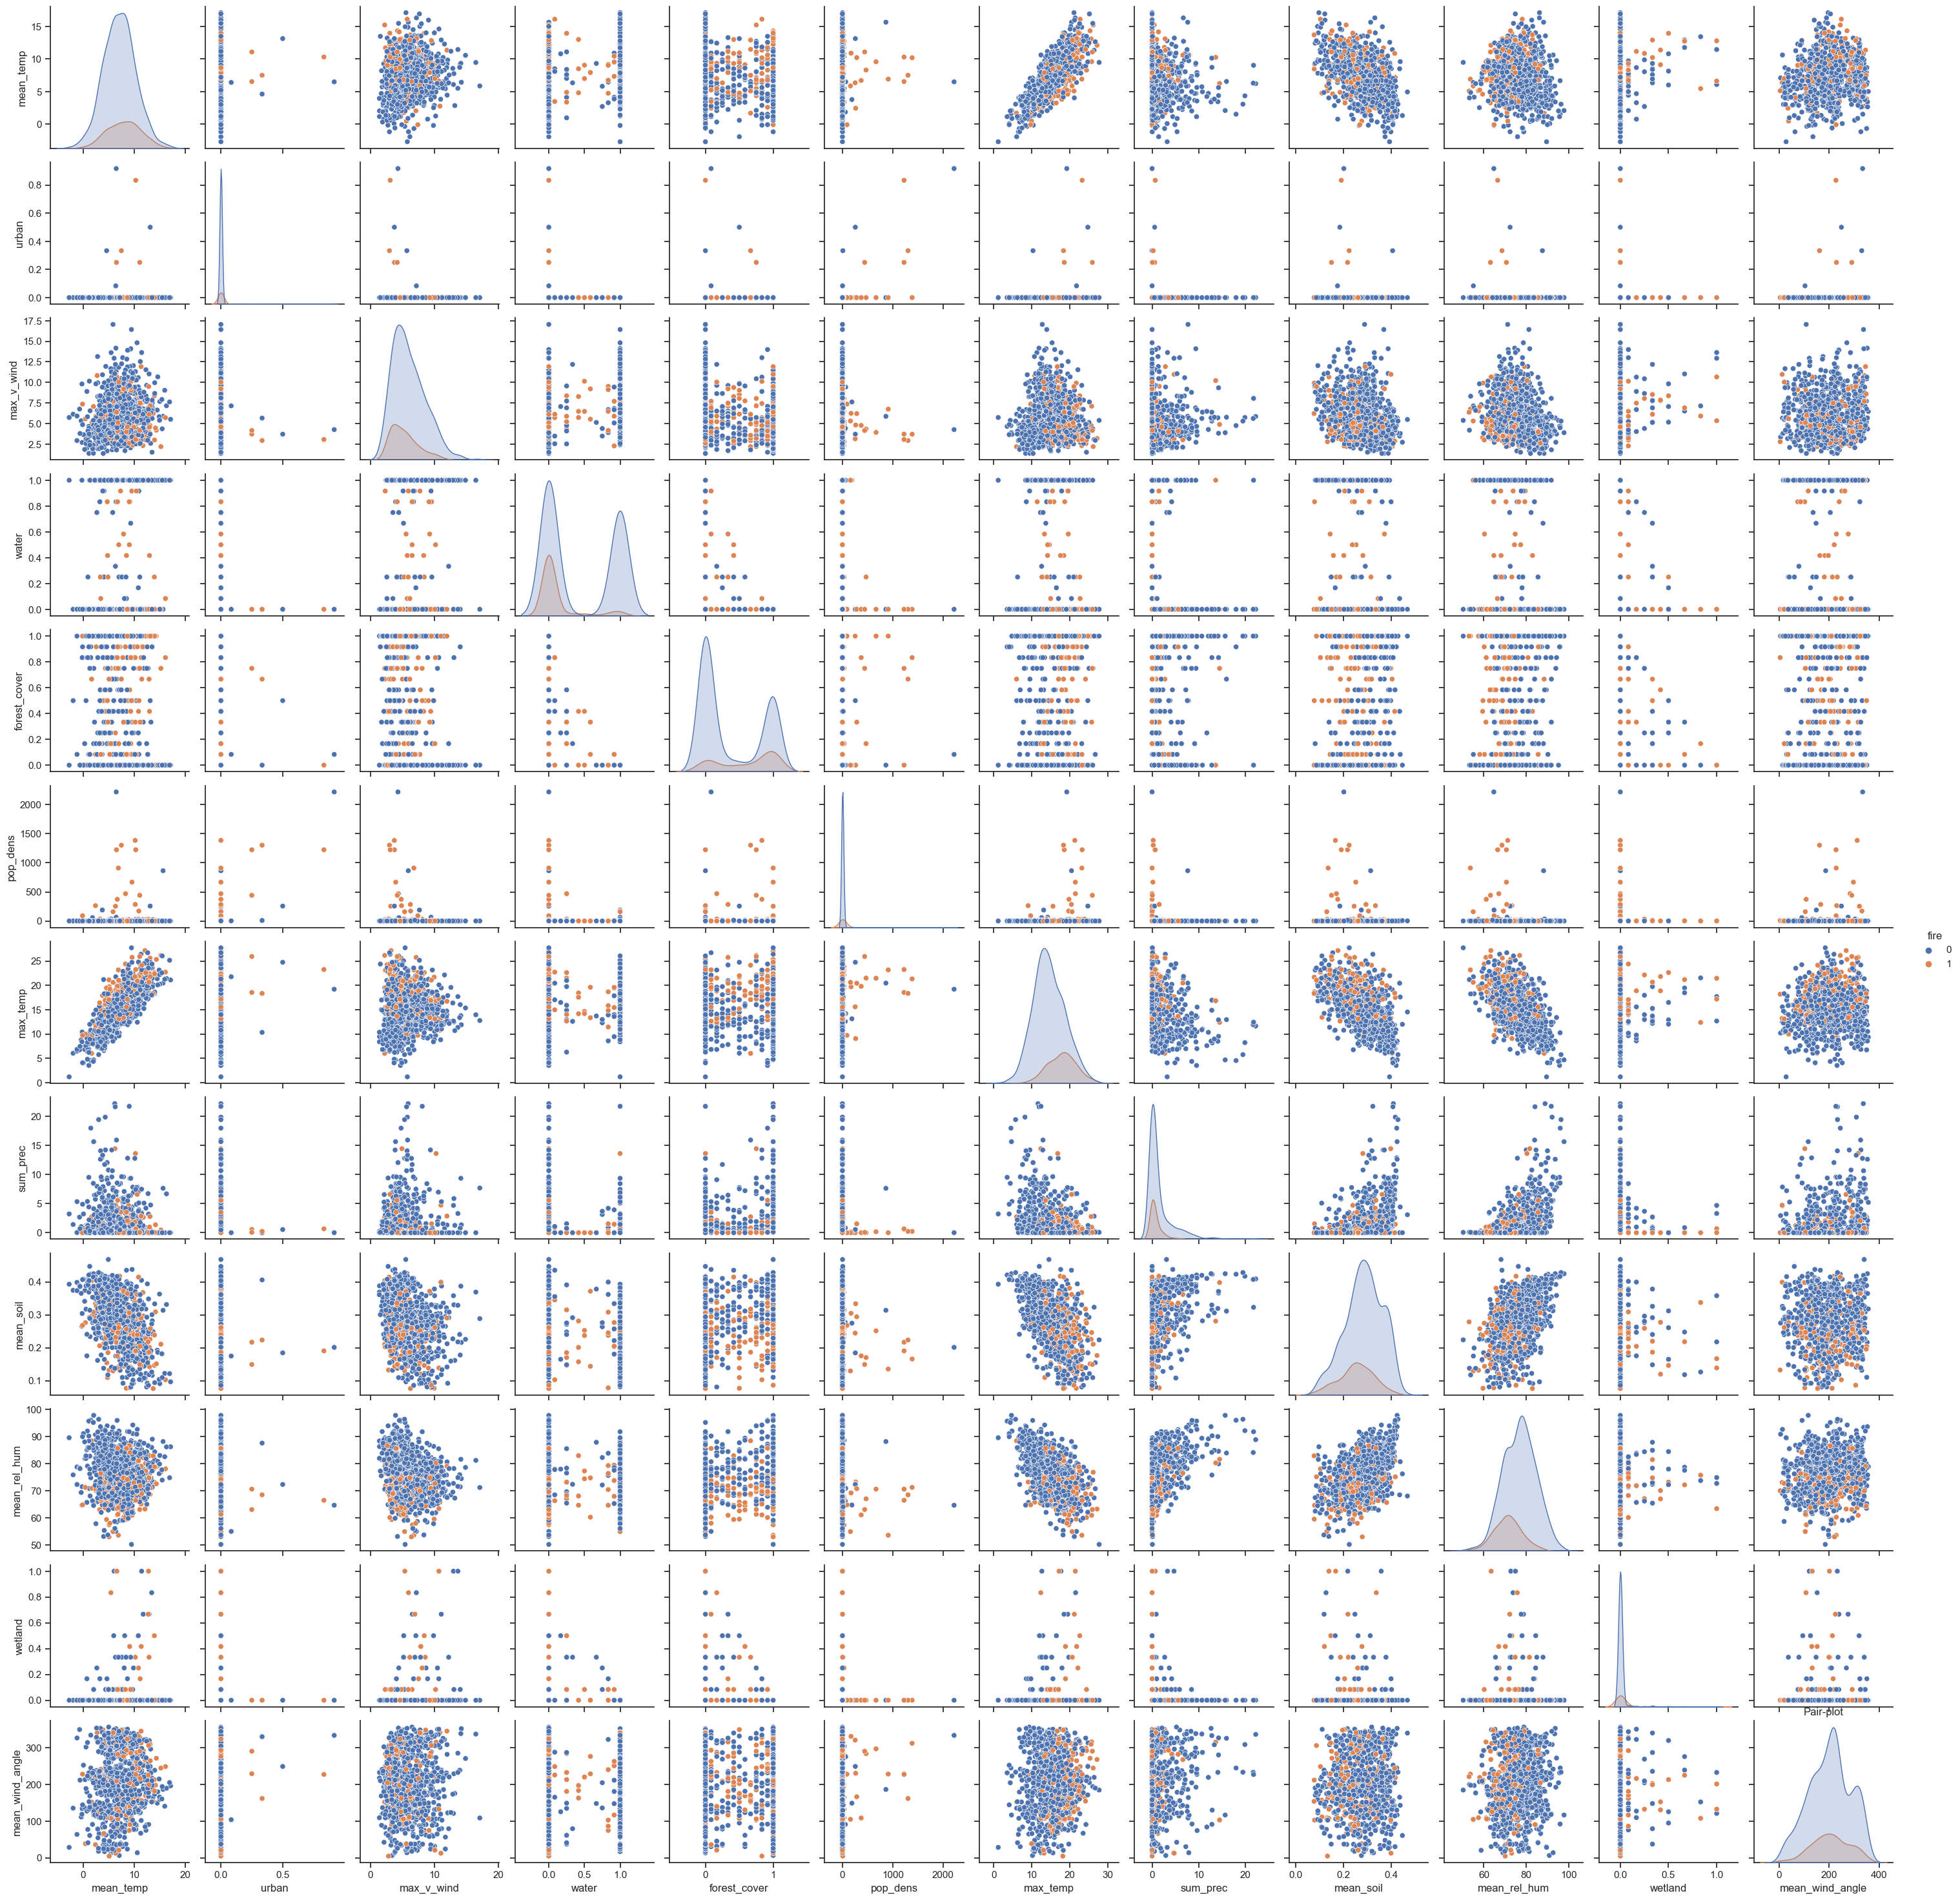

In [18]:
sns.set_theme(style='ticks')
sns.pairplot(data[:1000], hue='fire')
plt.title('Pair-plot')
plt.plot()

We can see that the feature between fire and non fire are closed. 

Here is some plots about the distribution about the feature. We can see for instance that the temperature is similar to a Gaussian. We can also see that most ratios are 0 or 1. 

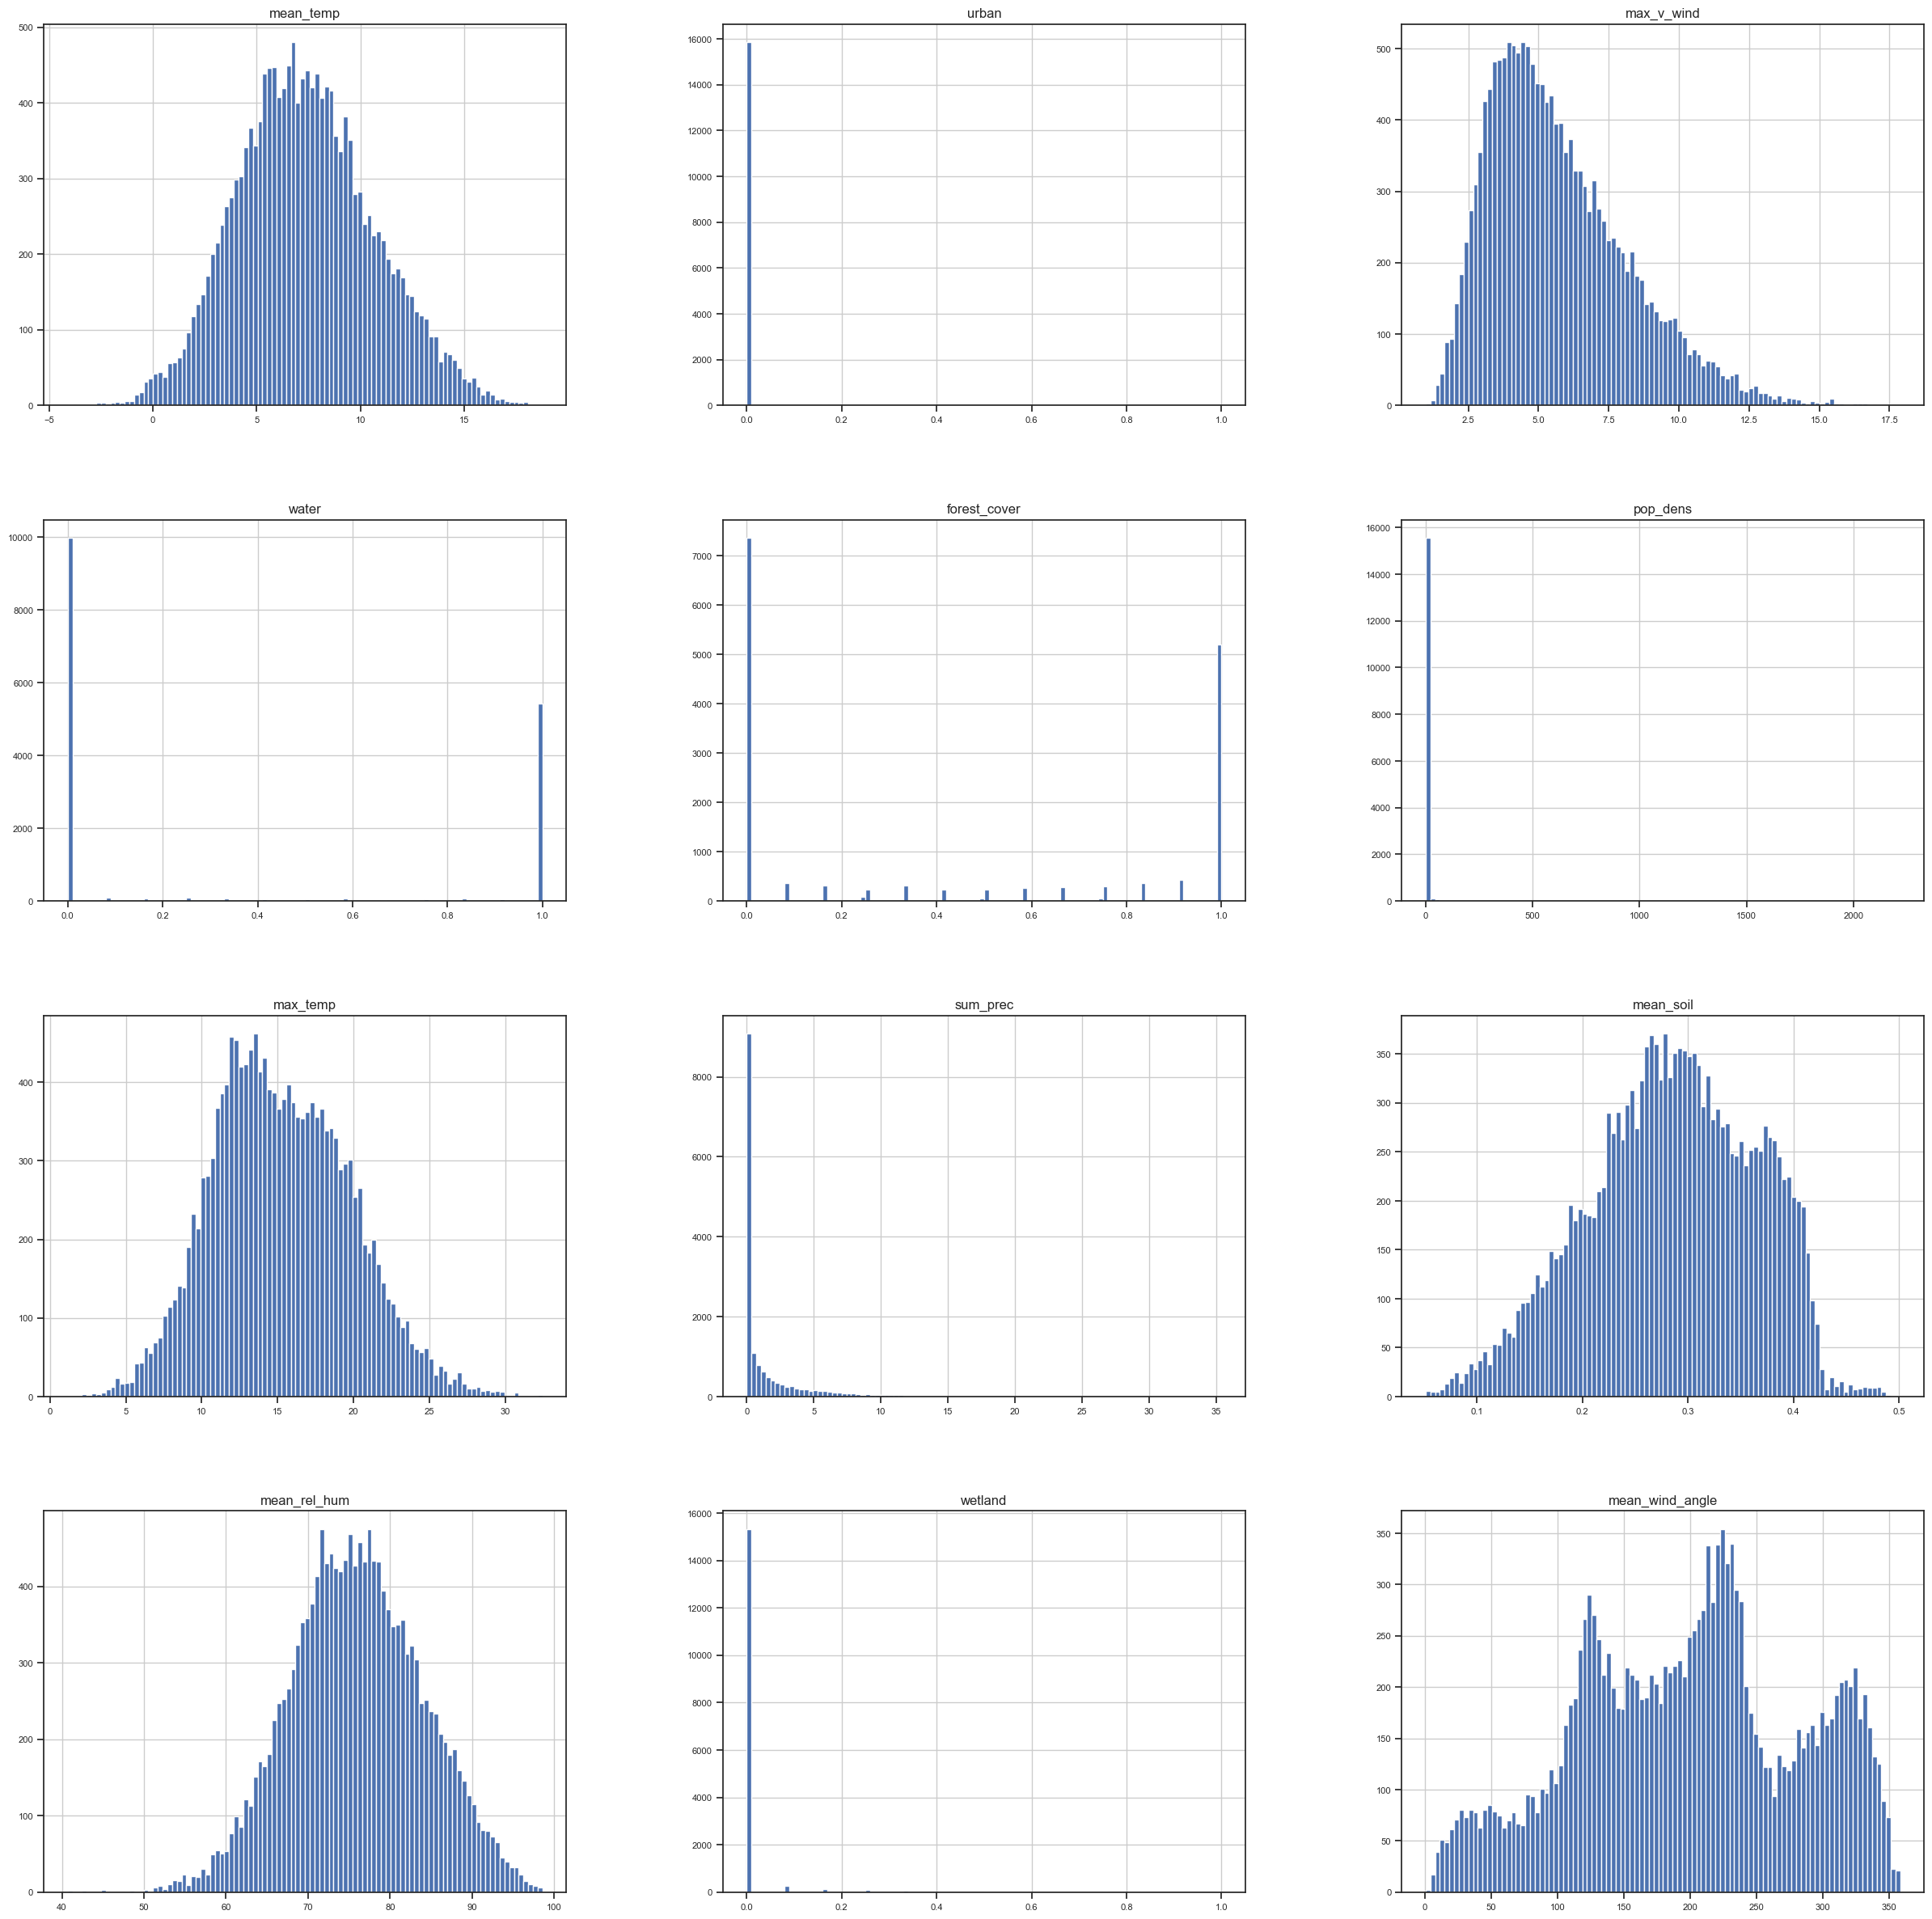

In [130]:
X_=data.copy()
X_.drop(columns=["fire"],axis=1,inplace=True)

X_.hist(figsize=(30, 30), bins = 100, xlabelsize=8, ylabelsize=8)
plt.show()

The cell below defines 2 functions to make visualization easier. Tey were defined for the target ``Vaccine``, but it is trivial to adapt the code to show results for ``Business2``.

You can uncomment the line corresponding to the desired visualization or add your owns:

**TODO: TO BE MODIFIED**

In [26]:
# plot_one("Continent", "Represented Continent")
# plot_one("trusthealth", "Trust in the health system")
# plot_one("Gender", "Gender")
# plot_one("Age_group", "Age Group")
# plot_one("within_country", "Income Level Within Country")
#plot_one("world_wide", "Income Level World Wide")

In [27]:
# plot_five(['Country'])
# plot_five(['Country', 'trusthealth'])


## **Baseline Model: Random Forest**

We propose a simple random forest as a first model to classify each data point.

Beforehand:
* one-hot encoding is applied to the categorical variable `vegetation_class`
* the score is the *adjusted* balanced accuracy score

**Pipeline Creation**

One Hot Encoding is applied on categorical variable `vegetation_class`

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

categorical_cols = ["vegetation_class"]
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
numerical_cols = ['mean_temp', 'urban', 'max_v_wind', 'water', 'forest_cover', 'pop_dens',
                  'max_temp', 'sum_prec', 'mean_soil', 'mean_rel_hum', 'wetland',
                  'mean_wind_angle']

numerical_pipeline = make_pipeline(
    StandardScaler(), SimpleImputer(strategy='constant', fill_value=-1)
)

preprocessor = make_column_transformer(
    (categorical_pipeline, categorical_cols),
    (numerical_pipeline, numerical_cols),
)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('transformer', preprocessor),
    ('classifier', RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight="balanced_subsample",
        criterion="gini",
        max_depth=6,
        min_samples_leaf=1,
        min_samples_split=3,
        n_estimators=50,)
    ),
])

**Training**

In [141]:
X_train, y_train = get_train_data("./")
X_train.head()

mean_temp  urban  max_v_wind  water  forest_cover  pop_dens   max_temp  \
5315    8.257360    0.0    8.415767    1.0      0.000000  0.000000  13.521884   
1736    8.711065    0.0    7.628944    1.0      0.000000  0.000000  13.623101   
452     4.703714    0.0    5.272585    0.0      0.166667  0.000000  10.895711   
2254    7.931396    0.0    4.751965    0.0      1.000000  8.781302  17.882578   
11015   7.375809    0.0    7.509340    0.0      0.000000  1.066338  12.989288   

       sum_prec  mean_soil  vegetation_class  mean_rel_hum  wetland  \
5315   0.000000   0.301087                 4     83.197449      0.0   
1736   0.000000   0.193443                 4     79.562096      0.0   
452    9.111566   0.391522                 1     84.149506      0.0   
2254   0.469582   0.209513                 0     71.443214      0.0   
11015  0.845634   0.220420                 1     72.718315      0.0   

       mean_wind_angle  
5315        252.254349  
1736        237.913284  
452         276.309753  
2254        341.007843  
11015       115.578300

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Scorer
scorer = make_scorer(balanced_accuracy_score, adjusted=True)

scores = cross_val_score(pipeline, X_train, y_train, cv=8, scoring=scorer)

print("mean: %e (+/- %e)" % (scores.mean(), scores.std()))

mean: 6.207758e-01 (+/- 1.775268e-02)


**Testing**

In [134]:
X_test, y_test = get_test_data("./")
X_test.head()

mean_temp  urban  max_v_wind  water  forest_cover  pop_dens   max_temp  \
4164    6.297787    0.0    5.742178    1.0      0.000000  0.001301  10.665769   
3800    9.390409    0.0    6.760290    1.0      0.000000  0.000000  13.116463   
14345   6.867529    0.0    4.409104    0.0      0.666667  0.684358  14.015584   
7368    8.309890    0.0    8.476142    1.0      0.000000  0.000000  16.172554   
4743    7.108046    0.0    7.044827    0.0      0.666667  0.000000  13.930200   

       sum_prec  mean_soil  vegetation_class  mean_rel_hum   wetland  \
4164   0.000000   0.346555                 4     85.478249  0.000000   
3800   0.000000   0.285273                 4     86.955528  0.000000   
14345  5.049985   0.304103                 0     83.335632  0.000000   
7368   0.000000   0.300282                 4     69.794075  0.000000   
4743   0.000000   0.296331                 0     75.217194  0.333333   

       mean_wind_angle  
4164        170.649246  
3800        246.511734  
14345       290.613373  
7368        190.528183  
4743        325.856445

In [135]:
clf = pipeline.fit(X_train, y_train)

In [136]:
y_pred = clf.predict(X_test)
metric = balanced_accuracy_score(y_test, y_pred, adjusted=True)
print("Adjusted balanced accuracy on test set:", metric)

Adjusted balanced accuracy on test set: 0.6508308463210639


## **Quick submission test**

You can test any submission locally by running:

```
ramp-test --submission <submission folder>
```
If you want to quickly test the that there are no obvious code errors, use the `--quick-test` flag to only use a small subset of the data.

```
ramp-test --submission <submission folder> --quick-test
```

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.